# Data Loading

In [22]:
# ───────────────────────────────────────
# Import Required Libraries
# ───────────────────────────────────────

# System & OS
import os
import sys
import warnings
warnings.filterwarnings("ignore")

# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import plotly.io as pio
pio.renderers.default = "png"

# Database
from sqlalchemy import create_engine

# Date & Time
from datetime import datetime

# ───────────────────────────────────────
# Set Folder Paths
# ───────────────────────────────────────

RAW_PATH   = "Data/raw_data/"
CLEAN_PATH = "Data/clean_data/"
#UTILS_PATH = os.path.abspath("utils")

# Add utils to system path
#if UTILS_PATH not in sys.path:
 #   sys.path.append(UTILS_PATH)


In [23]:
#Load a CSV file with error handling.
    

def load_csv_file(filepath):

    try:
        if not os.path.exists(filepath):
            raise FileNotFoundError(f"File not found at: {filepath}")
        
        df = pd.read_csv(filepath)
        print(f"Successfully loaded file: {filepath}")
        return df
    
    except FileNotFoundError as fe:
        print(fe)
    except pd.errors.ParserError as pe:
        print(f"Parsing error: {pe}")
    except Exception as e:
        print(f"Unexpected error: {e}")
    
    return None  # Return None if error occurs




# call load_csv_file()
sales_df = load_csv_file(f"{RAW_PATH}sales_transaction.csv")
customer_df = load_csv_file(f"{RAW_PATH}customer_profiles.csv")
inventory_df = load_csv_file(f"{RAW_PATH}product_inventory.csv")

Successfully loaded file: Data/raw_data/sales_transaction.csv
Successfully loaded file: Data/raw_data/customer_profiles.csv
Successfully loaded file: Data/raw_data/product_inventory.csv


# Data Exploration


In [24]:


def explore_dataset(df, name="DataFrame"):
    """
    Perform basic data exploration on a DataFrame.
    
    Parameters:
        df (pd.DataFrame): DataFrame to explore
        name (str): Optional name for print statements
        datetime_cols (list): List of columns to convert to datetime (optional)
    
    Returns:
        pd.DataFrame: Cleaned and explored DataFrame
    """
    print(f"\nExploring: {name}")

    print(f"\nShape: {df.shape}")

    print("\nFirst 5 rows:")
    display(pd.DataFrame(df.head()))
    
    print("\nInfo:")
    display(pd.DataFrame(df.info()))
    
    print("\nChecking Missing Values:")
    print(df.isnull().sum())

    print("\nChecking Duplicates:")
    print(df.duplicated().sum())


    print("\nChecking Datatypes:")
    display(pd.DataFrame(df.dtypes))
    
    print("\nSummary Statistics:")
    display(pd.DataFrame(df.describe(include='all')))
    
    print("\nNormalizing Column Names:")
    df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
    print(f"Normalized Columns: {df.columns.tolist()}")

    return df

sales_df = explore_dataset(sales_df, name="Sales Data")
print("\n")
print("-"*50)
print("\n")
customer_df = explore_dataset(customer_df, name="Customer Profiles")
print("\n")
print("-"*50)
print("\n")
inventory_df = explore_dataset(inventory_df, name="Inventory Data")




Exploring: Sales Data

Shape: (5002, 6)

First 5 rows:


,TransactionID,CustomerID,ProductID,QuantityPurchased,TransactionDate,Price
0,1,103,120,3,01/01/23,30.43
1,2,436,126,1,01/01/23,15.19
2,3,861,55,3,01/01/23,67.76
3,4,271,27,2,01/01/23,65.77
4,5,107,118,1,01/01/23,14.55



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      5002 non-null   int64  
 1   CustomerID         5002 non-null   int64  
 2   ProductID          5002 non-null   int64  
 3   QuantityPurchased  5002 non-null   int64  
 4   TransactionDate    5002 non-null   object 
 5   Price              5002 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 234.6+ KB


""



Checking Missing Values:
TransactionID        0
CustomerID           0
ProductID            0
QuantityPurchased    0
TransactionDate      0
Price                0
dtype: int64

Checking Duplicates:
2

Checking Datatypes:


,0
TransactionID,int64
CustomerID,int64
ProductID,int64
QuantityPurchased,int64
TransactionDate,object
Price,float64



Summary Statistics:


,TransactionID,CustomerID,ProductID,QuantityPurchased,TransactionDate,Price
count,5002.000000,5002.000000,5002.000000,5002.000000,5002,5002.000000
unique,NaN,NaN,NaN,NaN,209,NaN
top,NaN,NaN,NaN,NaN,01/01/23,NaN
freq,NaN,NaN,NaN,NaN,24,NaN
mean,2501.499200,506.722311,101.684926,2.464814,NaN,93.841925
std,1444.095969,290.862258,57.566997,1.116697,NaN,584.759375
min,1.000000,1.000000,1.000000,1.000000,NaN,10.050000
25%,1251.250000,254.000000,53.000000,1.000000,NaN,30.980000
50%,2501.500000,511.000000,101.000000,2.000000,NaN,58.550000
75%,3751.750000,762.000000,152.000000,3.000000,NaN,82.720000



Normalizing Column Names:
Normalized Columns: ['transactionid', 'customerid', 'productid', 'quantitypurchased', 'transactiondate', 'price']


--------------------------------------------------



Exploring: Customer Profiles

Shape: (1000, 5)

First 5 rows:


,CustomerID,Age,Gender,Location,JoinDate
0,1,63,Other,East,01/01/20
1,2,63,Male,North,02/01/20
2,3,34,Other,North,03/01/20
3,4,19,Other,NaN,04/01/20
4,5,57,Male,North,05/01/20



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  1000 non-null   int64 
 1   Age         1000 non-null   int64 
 2   Gender      1000 non-null   object
 3   Location    987 non-null    object
 4   JoinDate    1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


""



Checking Missing Values:
CustomerID     0
Age            0
Gender         0
Location      13
JoinDate       0
dtype: int64

Checking Duplicates:
0

Checking Datatypes:


,0
CustomerID,int64
Age,int64
Gender,object
Location,object
JoinDate,object



Summary Statistics:


,CustomerID,Age,Gender,Location,JoinDate
count,1000.000000,1000.000000,1000,987,1000
unique,NaN,NaN,3,4,1000
top,NaN,NaN,Other,West,01/01/20
freq,NaN,NaN,356,272,1
mean,500.500000,43.935000,NaN,NaN,NaN
std,288.819436,15.409485,NaN,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN
25%,250.750000,31.000000,NaN,NaN,NaN
50%,500.500000,44.000000,NaN,NaN,NaN
75%,750.250000,57.000000,NaN,NaN,NaN



Normalizing Column Names:
Normalized Columns: ['customerid', 'age', 'gender', 'location', 'joindate']


--------------------------------------------------



Exploring: Inventory Data

Shape: (200, 5)

First 5 rows:


,ProductID,ProductName,Category,StockLevel,Price
0,1,Product_1,Clothing,22,46.11
1,2,Product_2,Home & Kitchen,140,81.60
2,3,Product_3,Home & Kitchen,473,78.72
3,4,Product_4,Clothing,386,22.06
4,5,Product_5,Beauty & Health,284,17.97



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    200 non-null    int64  
 1   ProductName  200 non-null    object 
 2   Category     200 non-null    object 
 3   StockLevel   200 non-null    int64  
 4   Price        200 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 7.9+ KB


""



Checking Missing Values:
ProductID      0
ProductName    0
Category       0
StockLevel     0
Price          0
dtype: int64

Checking Duplicates:
0

Checking Datatypes:


,0
ProductID,int64
ProductName,object
Category,object
StockLevel,int64
Price,float64



Summary Statistics:


,ProductID,ProductName,Category,StockLevel,Price
count,200.000000,200,200,200.000000,200.000000
unique,NaN,200,4,NaN,NaN
top,NaN,Product_1,Home & Kitchen,NaN,NaN
freq,NaN,1,58,NaN,NaN
mean,100.500000,NaN,NaN,259.180000,56.995350
std,57.879185,NaN,NaN,143.032932,27.234336
min,1.000000,NaN,NaN,0.000000,10.050000
25%,50.750000,NaN,NaN,137.250000,31.492500
50%,100.500000,NaN,NaN,260.500000,58.735000
75%,150.250000,NaN,NaN,384.500000,82.057500



Normalizing Column Names:
Normalized Columns: ['productid', 'productname', 'category', 'stocklevel', 'price']


# Data Cleaning

In [25]:
def clean_sales_data(df):
    print("\nCleaning Sales Data...")

    df["transactiondate"] = pd.to_datetime(df["transactiondate"])
    print(pd.DataFrame(df.dtypes))
    print("\n'transactiondate' converted to datetime.")

    df.drop_duplicates(inplace=True)
    print(f"Duplicates Found: {df.duplicated().sum()}")
    return df
    
    
def clean_customer_data(df):

    print("\nCleaning Customer Data...")

    df["joindate"] = pd.to_datetime(df["joindate"])
    print(pd.DataFrame(df.dtypes))
    print("\n'joindate' converted to datetime.")

    
    df["location"].fillna("Unknown", inplace=True)
    print(f"Missing Values Found: {df["location"].isna().sum()}")
    
    return df

sales_df = clean_sales_data(sales_df)

print("-"*50)
customer_df = clean_customer_data(customer_df)




Cleaning Sales Data...
                                0
transactionid               int64
customerid                  int64
productid                   int64
quantitypurchased           int64
transactiondate    datetime64[ns]
price                     float64

'transactiondate' converted to datetime.
Duplicates Found: 0
--------------------------------------------------

Cleaning Customer Data...
                         0
customerid           int64
age                  int64
gender              object
location            object
joindate    datetime64[ns]

'joindate' converted to datetime.
Missing Values Found: 0


In [26]:
# Save cleaned Sales data
sales_df.to_csv(f"{CLEAN_PATH}cleaned_sales.csv", index=False)
print("Cleaned sales data saved to cleaned_sales.csv")

# Save cleaned Customer data
customer_df.to_csv(f"{CLEAN_PATH}cleaned_customers.csv", index=False)
print("Cleaned customer data saved to cleaned_customers.csv")

# Save cleaned Inventory data
inventory_df.to_csv(f"{CLEAN_PATH}cleaned_inventory.csv", index=False)
print("Inventory data saved to cleaned_inventory.csv")


Cleaned sales data saved to cleaned_sales.csv
Cleaned customer data saved to cleaned_customers.csv
Inventory data saved to cleaned_inventory.csv


In [27]:
import json
import urllib.parse


# Load config
with open("config/db_config.json") as f:
    config = json.load(f)

# Encode password
encoded_password = urllib.parse.quote_plus(config['password'])

# Build connection string
db_url = f"mysql+pymysql://{config['user']}:{encoded_password}@{config['host']}:{config['port']}/{config['database']}"

# Test connection
try:
    engine = create_engine(db_url)
    with engine.connect() as conn:
        print("Connection successful!")
except Exception as e:
    print("Connection failed!")
    print(e)


Connection successful!


In [28]:
# Load sales
sales_df.to_sql("sales", con=engine, index=False, if_exists="replace")
print("'sales' table loaded into MySQL")

# Load customers
customer_df.to_sql("customers", con=engine, index=False, if_exists="replace")
print("'customers' table loaded into MySQL")

# Load inventory
inventory_df.to_sql("inventory", con=engine, index=False, if_exists="replace")
print("'inventory' table loaded into MySQL")


'sales' table loaded into MySQL
'customers' table loaded into MySQL
'inventory' table loaded into MySQL


# Exploratory Data Analysis & Business Insights


## Business Problem 1: Identify High-Performing & Low-Performing Products
### EDA:
Join sales with inventory on productid

Check total units sold and revenue per product

Compare across categories

In [29]:
# Top 10 selling products

query = """
SELECT 
    p.productname,
    SUM(s.quantitypurchased) AS total_units_sold,
    SUM(s.quantitypurchased * s.price) AS total_revenue
FROM sales s
JOIN inventory p ON s.productid = p.productid
GROUP BY p.productname
ORDER BY total_units_sold DESC
LIMIT 10;

"""

top_products_df = pd.read_sql_query(query, con=engine)
display(top_products_df)


,productname,total_units_sold,total_revenue
0,Product_182,102.0,3144.66
1,Product_17,100.0,9450.00
2,Product_87,92.0,7817.24
3,Product_71,88.0,4729.12
4,Product_195,87.0,6229.20
5,Product_179,86.0,7388.26
6,Product_177,86.0,3354.00
7,Product_54,86.0,7052.86
8,Product_13,85.0,1596.30
9,Product_22,85.0,1978.80


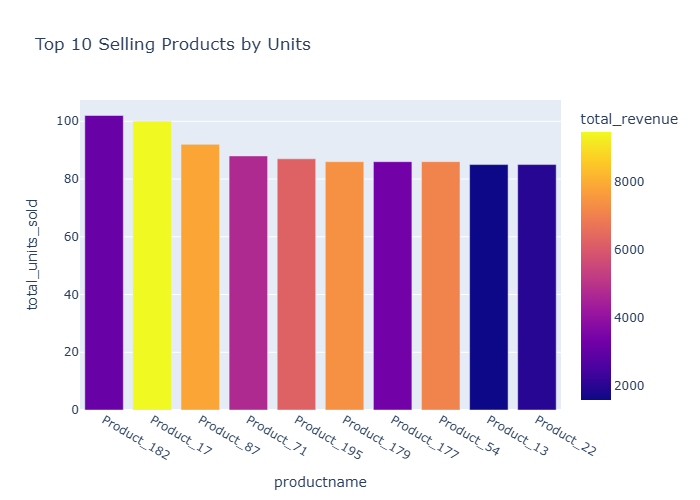

In [30]:
px.bar(top_products_df, x='productname', y='total_units_sold', 
       title='Top 10 Selling Products by Units', color='total_revenue')


In [31]:
# Bottom 10 performing products
query = '''
SELECT 
    p.productname,
    IFNULL(SUM(s.quantitypurchased), 0) AS total_units_sold

FROM inventory p
LEFT JOIN sales s ON p.productid = s.productid
GROUP BY p.productname
ORDER BY total_units_sold ASC
LIMIT 10;'''
bottom_products_df = pd.read_sql_query(query, con=engine)
display(bottom_products_df)

,productname,total_units_sold
0,Product_142,27.0
1,Product_33,31.0
2,Product_174,33.0
3,Product_41,35.0
4,Product_60,35.0
5,Product_159,35.0
6,Product_91,35.0
7,Product_198,36.0
8,Product_163,39.0
9,Product_124,39.0


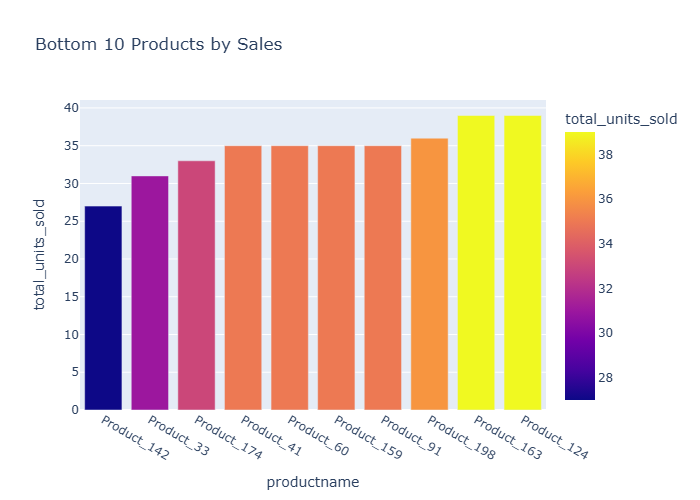

In [32]:
px.bar(bottom_products_df, x='productname', y='total_units_sold', 
       title='Bottom 10 Products by Sales', color='total_units_sold')


## Business Problem 2: Understand Customer Segments Based on Purchases
### EDA:
Total orders per customer

Total amount spent

Join with customer demographics (age, gender, location)

In [33]:
## Spending and frequency per customer
query = '''SELECT 
    c.customerid,
    c.age,
    c.gender,
    c.location,
    COUNT(s.transactionid) AS total_orders,
    SUM(s.quantitypurchased * s.price) AS total_spent
FROM customers c
JOIN sales s ON c.customerid = s.customerid
GROUP BY c.customerid, c.age, c.gender, c.location
ORDER BY total_spent DESC;
'''
customer_spending = pd.read_sql(query, engine)
customer_spending

,customerid,age,gender,location,total_orders,total_spent
0,973,50,Male,North,9,57089.99
1,984,42,Female,East,7,38518.06
2,172,33,Female,South,7,38208.18
3,819,60,Other,South,6,38008.16
4,371,51,Female,West,5,37809.98
...,...,...,...,...,...,...
984,766,32,Male,West,1,28.86
985,555,63,Other,East,1,22.27
986,219,23,Male,Unknown,1,22.24
987,255,29,Male,South,1,14.29


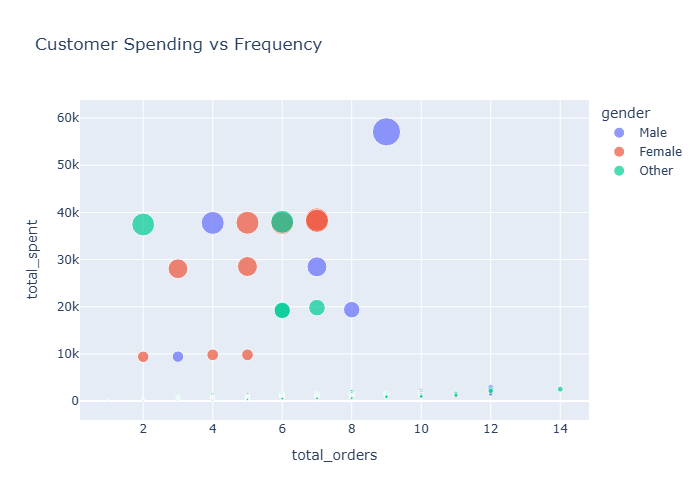

In [34]:
px.scatter(customer_spending, x='total_orders', y='total_spent', color='gender',
           size='total_spent', hover_data=['customerid', 'location'],
           title='Customer Spending vs Frequency')


In [35]:
# Segment Customers by Frequency

query_segments = """
SELECT 
    customerid,
    COUNT(transactionid) AS total_orders,
    CASE 
        WHEN COUNT(transactionid) = 0 THEN 'Inactive'
        WHEN COUNT(transactionid) BETWEEN 1 AND 4 THEN 'Low'
        WHEN COUNT(transactionid) BETWEEN 5 AND 7 THEN 'Medium'
        ELSE 'High'
    END AS customer_segment
FROM sales
GROUP BY customerid;
"""
customer_segments = pd.read_sql(query_segments, engine)
customer_segments


,customerid,total_orders,customer_segment
0,103,5,Medium
1,436,7,Medium
2,861,5,Medium
3,271,4,Low
4,107,5,Medium
...,...,...,...
984,487,1,Low
985,810,1,Low
986,355,1,Low
987,45,1,Low


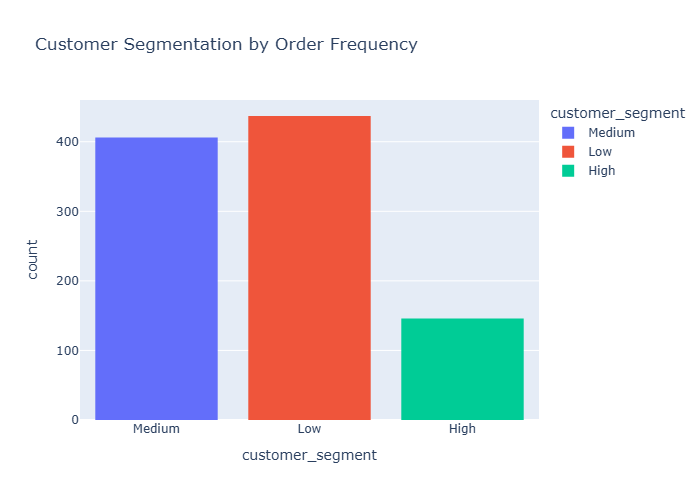

In [36]:
px.histogram(customer_segments, x='customer_segment', color='customer_segment',
             title='Customer Segmentation by Order Frequency')


## Business Problem 3: Track Repeat and Loyal Customers
### EDA:
Count distinct purchase days per customer

Identify customers who shop repeatedly

Join with join date → How long they've been with us

In [37]:
# Customers with Multiple Purchase Days
query_active_days = """
SELECT 
    customerid,
    COUNT(DISTINCT DATE(transactiondate)) AS active_days
FROM sales
GROUP BY customerid
HAVING active_days > 1
ORDER BY active_days DESC;
"""
repeat_customers = pd.read_sql(query_active_days, engine)
repeat_customers


,customerid,active_days
0,664,14
1,39,12
2,99,12
3,670,12
4,929,12
...,...,...
945,880,2
946,889,2
947,950,2
948,961,2


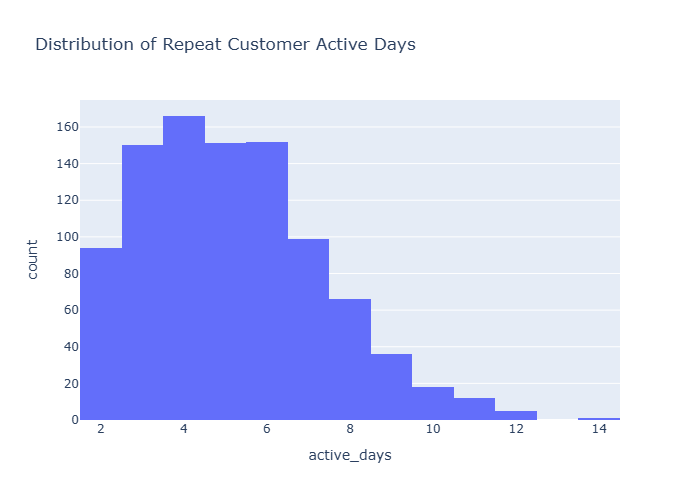

In [38]:
px.histogram(repeat_customers, x='active_days', nbins=20, 
             title='Distribution of Repeat Customer Active Days')


In [39]:
# Loyalty Based on Membership Duration
query_loyalty = """
SELECT 
    c.customerid,
    DATEDIFF(MAX(s.transactiondate), c.joindate) AS days_active,
    COUNT(s.transactionid) AS total_orders
FROM customers c
JOIN sales s ON c.customerid = s.customerid
GROUP BY c.customerid, c.joindate;
"""

loyalty_df = pd.read_sql(query_loyalty, engine)
loyalty_df


,customerid,days_active,total_orders
0,103,1203,5
1,436,833,7
2,861,496,5
3,271,1107,4
4,107,1320,5
...,...,...,...
984,487,763,1
985,810,413,1
986,355,914,1
987,45,1255,1


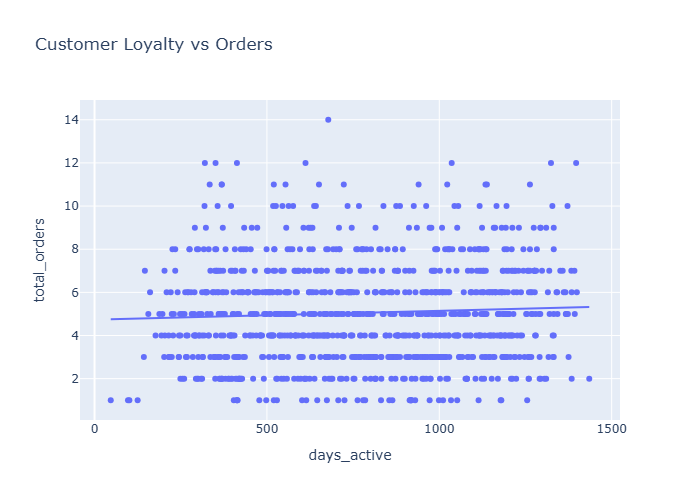

In [40]:
px.scatter(loyalty_df, x='days_active', y='total_orders',
           title='Customer Loyalty vs Orders', trendline='ols')


## Business Problem 4: Monthly Revenue Trends
### EDA:
Time-based trend analysis

Group by month, category, location if needed

In [41]:
query_monthly_revenue = """
SELECT 
    DATE_FORMAT(transactiondate, '%%Y-%%m') AS month,
    SUM(quantitypurchased * price) AS monthly_revenue
FROM sales
GROUP BY month
ORDER BY month;
"""
monthly_revenue_df = pd.read_sql(query_monthly_revenue, engine)
monthly_revenue_df


,month,monthly_revenue
0,2023-01,141982.12
1,2023-02,113329.00
2,2023-03,171520.97
3,2023-04,110728.22
4,2023-05,114711.25
5,2023-06,242401.87
6,2023-07,138554.43
7,2023-08,33739.14
8,2023-09,51680.70
9,2023-10,41627.48


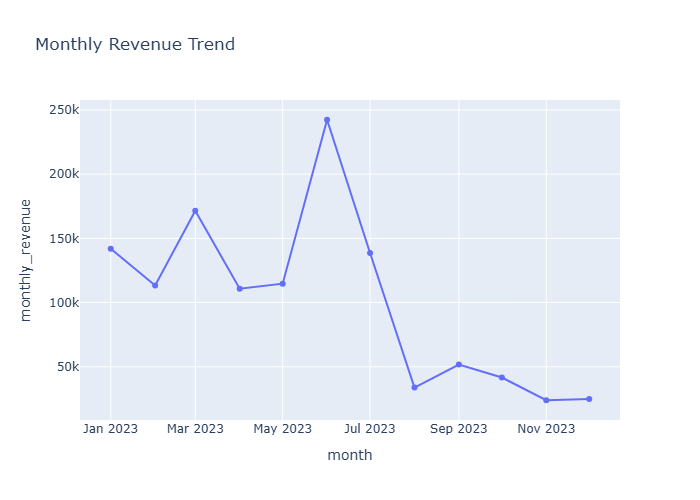

In [42]:
px.line(monthly_revenue_df, x='month', y='monthly_revenue', markers=True,
        title='Monthly Revenue Trend')
